# Obesity Classification Data Science Project

## Overview

This project focuses on the classification of individuals based on their obesity status. The dataset used for this project contains information collected from various sources, including medical records, surveys, and self-reported data. The goal is to analyze and classify individuals into different obesity categories using the provided data.

## Data Source

This dataset is available on Kaggel in the following link:
> https://www.kaggle.com/datasets/sujithmandala/obesity-classification-dataset

## Dataset

The dataset includes the following columns:

- **ID**: A unique identifier for each individual
- **Age**: The age of the individual
- **Gender**: The gender of the individual
- **Height**: The height of the individual in centimeters
- **Weight**: The weight of the individual in kilograms
- **BMI**: The body mass index of the individual, calculated as weight divided by height squared
- **Label**: The obesity classification of the individual, which can be one of the following:
  - Normal Weight
  - Overweight
  - Obese
  - Underweight

## Objective

The goal of this project is to:

1. Understand and visualize the dataset.
2. Train a classification model to accurately predict the class of obesity based on the four features.
3. Evaluate the performance of different classification models using metrics such as accuracy, precision, recall, and F1-score.

## Problem Statement

1. **Data Exploration**:
   - Visualize the data to understand the distribution of features for each species.
   - Analyze the relationships between different features using scatter plots, pair plots, and correlation matrices.
   
2. **Data Preprocessing & Cleaning**:
   - Handle any missing values (though none are present in this dataset).
   - Outlier detection and removal from the dataset.
   - Duplicate row detection and removal.

### Load Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import os

### Settings

In [54]:
# Warnings
warnings.filterwarnings("ignore")
# Plot
sns.set_style("darkgrid")
# Path
data_path= "../data"
csv_path= os.path.join(data_path, "Obesity Classification.csv")

### Load Data

In [96]:
df = pd.read_csv(csv_path)

In [91]:
# Show 1st 5 observation to get an idea about the data present in each feature
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


### Exploratory Data Analysis

In [22]:
# Data Description
print("=" * 60)
print("DATA DESCRIPTION")
print("=" * 60)
print(f"Number of observations: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

DATA DESCRIPTION
Number of observations: 108
Number of features: 7


In [23]:
# Feature Description
print("=" * 60)
print("FEATURE DESCRIPTION")
print("=" * 60)
print(df.dtypes)
print("-" * 60)
num_cols = [ col for col in df.columns if df[col].dtype != "object"]
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
unique_cols = [col for col in df.columns if df[col].nunique() == df.shape[0]]
print(f"Number of Numerical features: {len(num_cols)}")
print(num_cols)
print("-" * 60)
print(f"Number of Categorical features: {len(cat_cols)}")
print(cat_cols)
print("-" * 60)
print(f"Number of features containing unique values: {len(unique_cols)}")
print(unique_cols)
print("-" * 60)

FEATURE DESCRIPTION
ID          int64
Age         int64
Gender     object
Height      int64
Weight      int64
BMI       float64
Label      object
dtype: object
------------------------------------------------------------
Number of Numerical features: 5
['ID', 'Age', 'Height', 'Weight', 'BMI']
------------------------------------------------------------
Number of Categorical features: 2
['Gender', 'Label']
------------------------------------------------------------
Number of features containing unique values: 1
['ID']
------------------------------------------------------------


### Key Findings

- This dataset contains **5** numerical features and **2** categorical features(one of them is output feature).
- The numerical feature **ID** contains unique values for each observation. This feature will not help the machine learning algorithms to find pattern in the data. So, this feature should be dropped.

In [24]:
# Missing value detection
print("=" * 60)
print("MISSING VALUE DETECTION")
print("=" * 60)
if df.isnull().sum().sum() > 0:
    print(df.isnull().sum())
else:
    print("Missing value is not present  in any feature.")

MISSING VALUE DETECTION
Missing value is not present  in any feature.


In [25]:
# Duplicate Observation Detection
print("=" * 60)
print("DUPLICATE OBSERVATION DETECTION")
print("=" * 60)
print(f"Number of duplicate observations: {df.duplicated().sum()}")

DUPLICATE OBSERVATION DETECTION
Number of duplicate observations: 0


In [26]:
# Statistical Information of Numerical features
num_cols.remove("ID")
df[num_cols].describe()

,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000
mean,46.555556,166.574074,59.490741,20.549074
std,24.720620,27.873615,28.856233,7.583818
min,11.000000,120.000000,10.000000,3.900000
25%,27.000000,140.000000,35.000000,16.700000
50%,42.500000,175.000000,55.000000,21.200000
75%,59.250000,190.000000,85.000000,26.100000
max,112.000000,210.000000,120.000000,37.200000


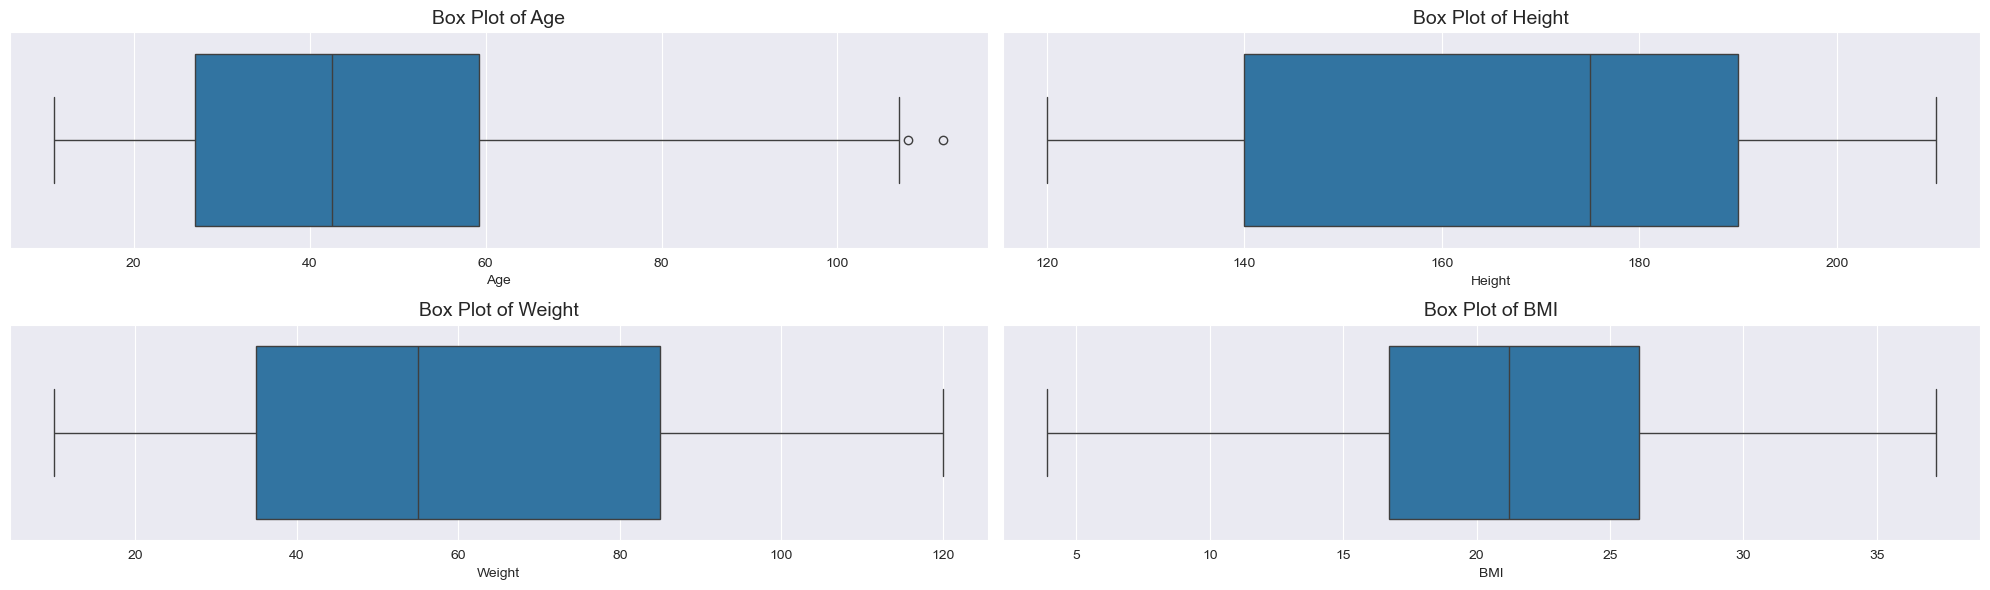

In [55]:
# Outlier Detection in Numerical Features with Box Plot Analysis
fig, axes = plt.subplots(nrows= 2, ncols= 2, figsize= (20, 6))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(data= df, x= col, ax= axes[i])
    axes[i].set_title(f"Box Plot of {col}", fontsize= 14)
plt.tight_layout()
plt.show()

### Key Findings

- Only **Age** feature has a very few outliers over highter extreme.

### Target Analysis(Understanding the Obesity Label Distribution)

Analyze the distribution of 4 obesity labels.

OBESITY LABELS ANALYSIS
Label
Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: count, dtype: int64


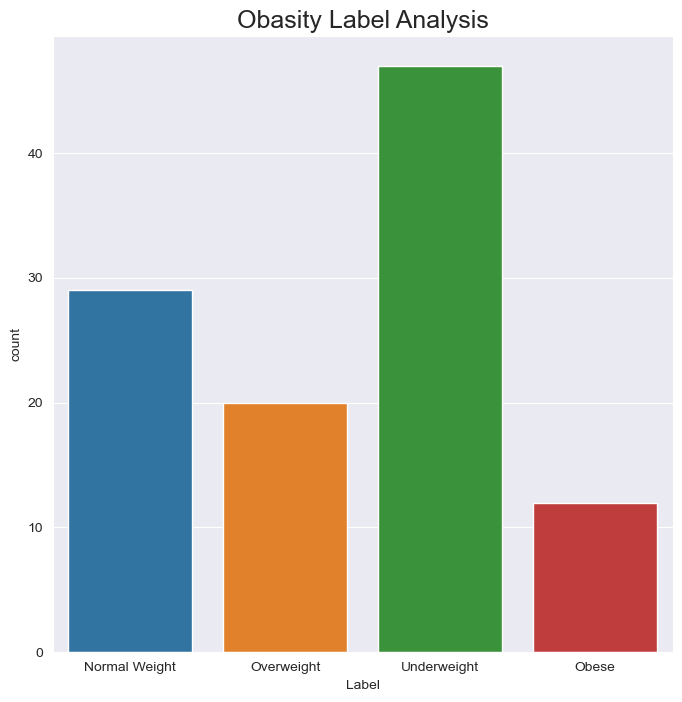

In [56]:
# Count each obesity labels
print("=" * 60)
print("OBESITY LABELS ANALYSIS")
print("=" * 60)
obesity_labels = df["Label"].value_counts()
print(obesity_labels)

# Visualization of obesity labels
plt.figure(figsize=(8, 8))
sns.countplot(data= df, x= "Label", hue= "Label")
plt.title("Obasity Label Analysis", fontsize= 18)
plt.show()

### Key Findings

- Most of the observations(**around 50%**) in this dataset are **Underweight**.
- Least number of observations(**around 10%**) in dataset are **Obase**.
- This dataset is **imbalanced**.

### Gender Analysis(Impact of Gender on Obesity)

Analyze whether gender has any effect on the labels of obesity.

GENDER ANALYSIS
           Label  Gender  Percentage
0  Normal Weight  Female   23.076923
1          Obese  Female    0.000000
2     Overweight  Female   15.384615
3    Underweight  Female   61.538462
4  Normal Weight    Male   30.357143
5          Obese    Male   21.428571
6     Overweight    Male   21.428571
7    Underweight    Male   26.785714


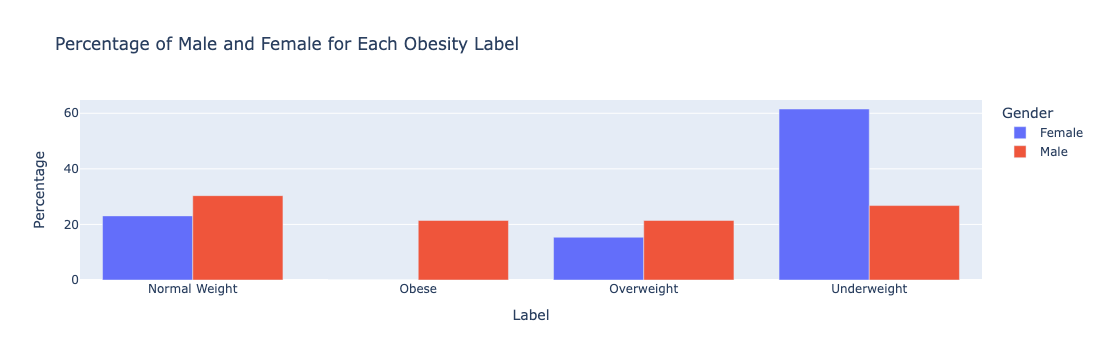

<Figure size 800x800 with 0 Axes>

In [65]:
# Calculate the obesity labels by gender
gender_labels = df.groupby(["Label", "Gender"]).size().unstack(fill_value= 0)
gender_label_percentage = gender_labels.div(gender_labels.sum(axis= 0), axis= 1) * 100
glp_df = gender_label_percentage.reset_index().melt(id_vars = "Label", var_name= "Gender", value_name= "Percentage")
print("=" * 60)
print("GENDER ANALYSIS")
print("=" * 60)
print(glp_df)

# Visualize the Gender Analysis
plt.figure(figsize= (8, 8))
fig = px.bar(glp_df,
    x= "Label",
    y= "Percentage",
    color= "Gender",
    title= "Percentage of Male and Female for Each Obesity Label",
    barmode= "group"
)
fig.show()
# sns.barplot(data= glp_df, x= "Label", y= "Percentage", hue= "Gender", )
# plt.title("Percentage of Male and Female for Each Obesity Label", fontsize= 16)
# plt.xlabel("Label of Obesity", fontsize= 14)
# plt.ylabel("Percentage of Gender", fontsize= 14)
# plt.legend()
# plt.show()

### Key Findings

- Chances of obesity in male is higher than the female.

### Age Analysis(Effect of Age on Obesity)

Visualize how age is influencing the chances of obesity

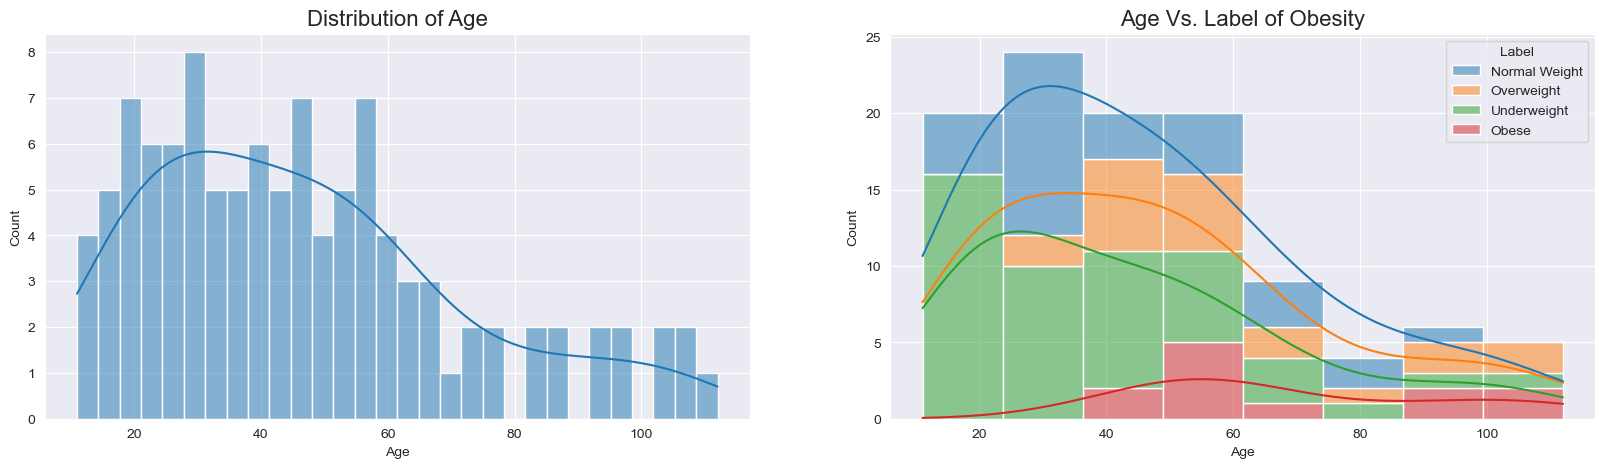

In [71]:
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize= (20, 5))

# Age Distribution
sns.histplot(data= df, x= "Age", bins= 30, kde= True, ax= axes[0])
axes[0].set_title("Distribution of Age", fontsize= 16)

# Age Vs. Label of Obesity
sns.histplot(data= df, x= "Age", hue= "Label", kde= True, multiple= "stack", ax= axes[1])
axes[1].set_title("Age Vs. Label of Obesity", fontsize= 16)
plt.show()

### key Findings

- Chance of obesity is high in middle and oldage(40 and above). This indicates as the age increases people become overweighted and finally obese. 

### Weight Analysis(Effect of Weight on Obesity)

Visualize how weight is influencing the labels of obesity.

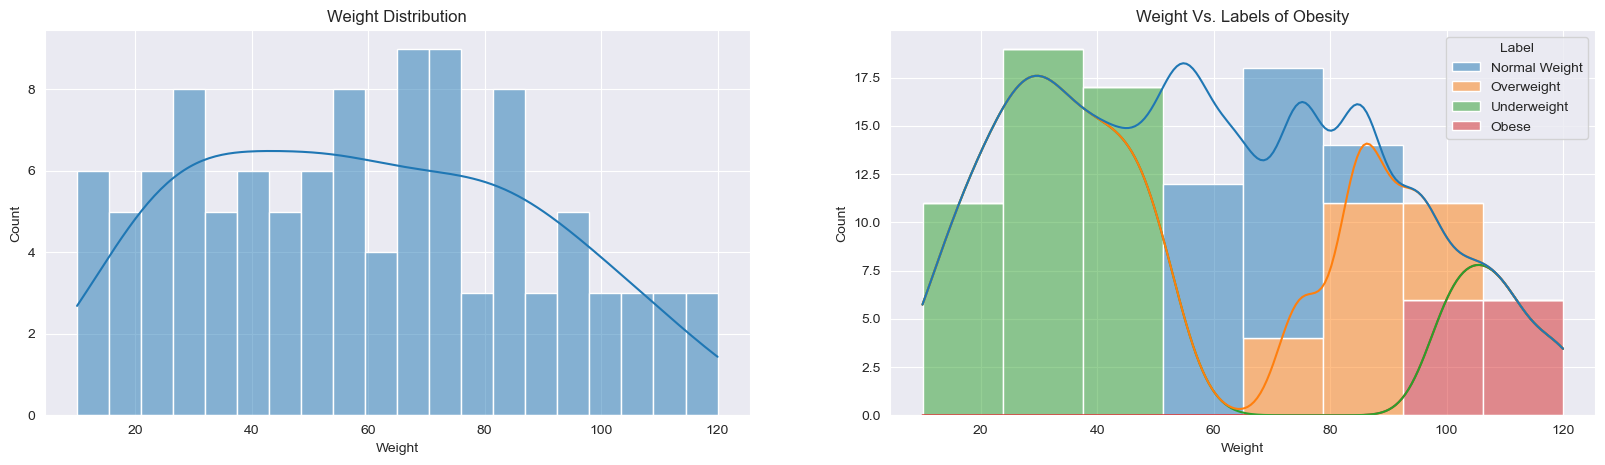

In [72]:
fig, axes= plt.subplots(nrows= 1, ncols= 2, figsize= (20, 5))

# Distribution of Weight
sns.histplot(data= df, x= "Weight", kde= True, bins= 20, ax= axes[0])
axes[0].set_title("Weight Distribution")

# Weight Vs. Obesity Labels
sns.histplot(data= df, x= "Weight", hue= "Label", kde= True, multiple= "stack", ax= axes[1])
axes[1].set_title("Weight Vs. Labels of Obesity")
plt.show()

### Key Findings

- The people having weight over **60Kg** is called **overweight**. But for tall people this weight is normal weight.
- The people having weight over **100Kg** is called **obese**. But for tall people this weight is overweight.

### BMI Analysis(Effect of BMI on Obesity)

Visualize how BMI(Body Mass Index) is influencing the labels of obesity

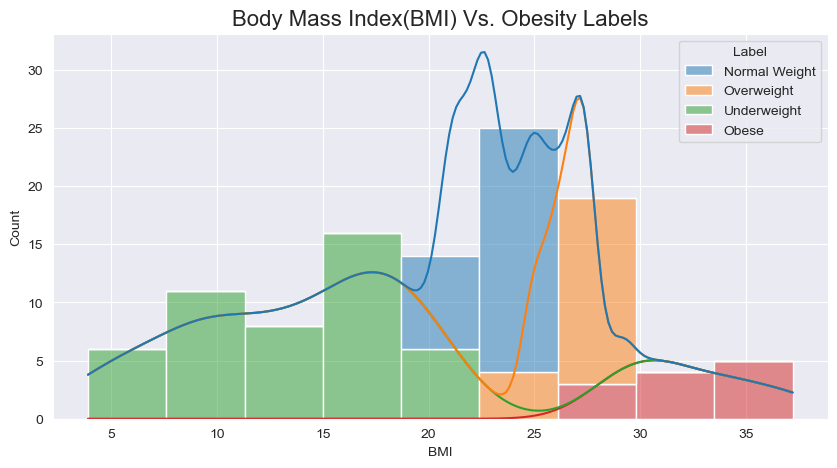

In [73]:
# BMI Vs. Labels of Obesity
plt.figure(figsize=(10, 5))
sns.histplot(data= df, x= "BMI", hue= "Label", kde= True, multiple="stack")
plt.title("Body Mass Index(BMI) Vs. Obesity Labels", fontsize= 16)
plt.show()

### Key Findings

- The Body Mass Index(BMI) over **25** is a clear indication of chances of obesity.

### Height Analysis(Impact of Height on Obesity Labels)

Visualize how height is influencing the labels of obesity.

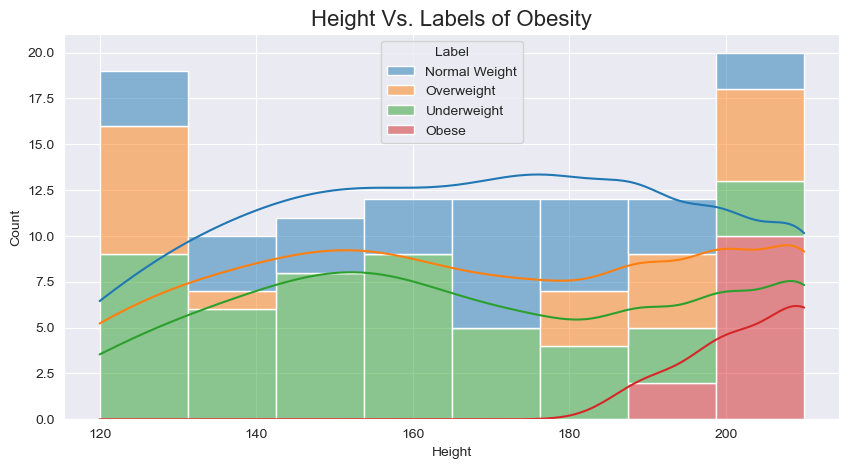

In [74]:
# Height Vs. Obesity Labels
plt.figure(figsize=(10, 5))
sns.histplot(data= df, x= "Height", hue="Label", kde= True, multiple= "stack")
plt.title("Height Vs. Labels of Obesity", fontsize= 16)
plt.show()

### Key Findings

- Chance of obesity is not directly influenced by the height Though in these observations it is shown that taller people has a chance of obesity may be due to their weight.
- Shorter people with high weight also have a chance of obesity.

### Mutivariate Analysis(Impact of Gender and Age on Obesity Labels)

Analyze the effect of gender and age in combination on the labels of obesity.

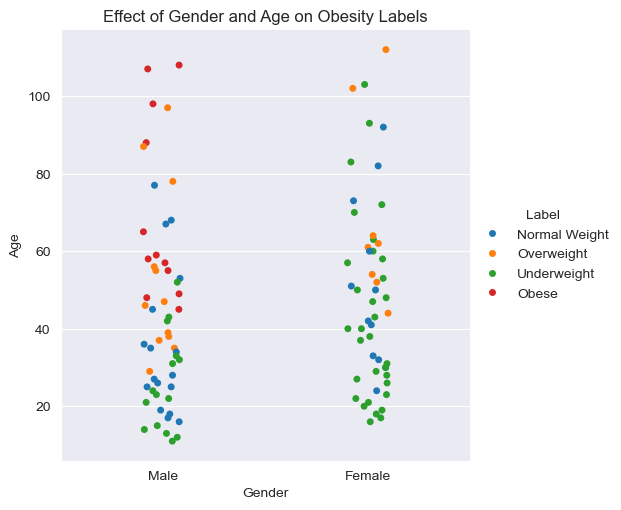

In [84]:
# Create a catplot with Gender and Obesity labels, colored by Age
sns.catplot(x="Gender", y="Age", hue="Label", data=df, kind="strip", jitter=True)
plt.title("Effect of Gender and Age on Obesity Labels")
plt.show()

### Key Findings

- Male and female become overweighted as their age increases (significantly over 40 years)
- Male become obese compared to female as their age increases.

### Multivariate Analysis(Effect of Height and BMI on Obesity Labels)

Analyze the effect of height and BMI for detecting the labels of obesity

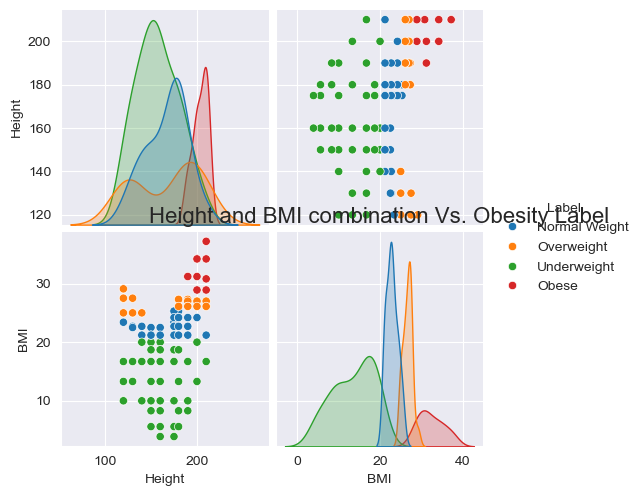

In [85]:
# Create a Pair plot with height and BMI for obesity labels
sns.pairplot(data= df, hue= "Label", diag_kind= "kde", vars= ["Height", "BMI"])
plt.title("Height and BMI combination Vs. Obesity Label", fontsize= 16)
plt.show()

### Key Findings

- High BMI causes overweight in all range of heights.
- High BMI in taller people causes obeseity.

### Multivariate Analysis(Effect of Age and BMI on Obesity Labels)

Analyze the effect of age and BMI for detecting the labels of obesity

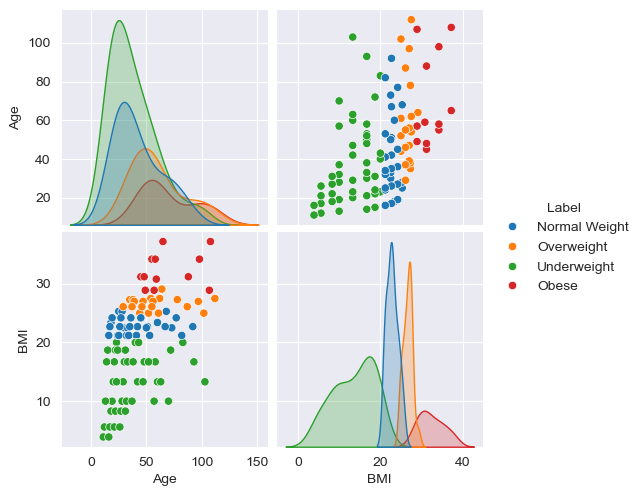

In [86]:
# Create a pair plot with age and BMI for obesity labels
sns.pairplot(data= df, hue="Label", diag_kind= "kde", vars= ["Age", "BMI"])
plt.show()

### Key Findings

- BMI is increasing with Age which causes overweight and obeseity.

### Data Cleaning and Feature Engineering

In [97]:
# Remove Unnecessary Features

# Here ID feature is containing unique values for each observation which is not useful for finding patterns in the data for ML models.

df.drop("ID", axis= 1, inplace= True)
# Sanity check
df.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175,80,25.3,Normal Weight
1,30,Female,160,60,22.5,Normal Weight
2,35,Male,180,90,27.3,Overweight
3,40,Female,150,50,20.0,Underweight
4,45,Male,190,100,31.2,Obese


In [98]:
# Encode the Gender feature
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})
# Sanity check
df.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,1,175,80,25.3,Normal Weight
1,30,0,160,60,22.5,Normal Weight
2,35,1,180,90,27.3,Overweight
3,40,0,150,50,20.0,Underweight
4,45,1,190,100,31.2,Obese


In [99]:
# Encode the Label(Target) feature
df["Label"] = df["Label"].map({"Underweight": 0, "Normal Weight": 1, "Overweight": 2, "Obese": 3})
# Sanity Check
df.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,1,175,80,25.3,1
1,30,0,160,60,22.5,1
2,35,1,180,90,27.3,2
3,40,0,150,50,20.0,0
4,45,1,190,100,31.2,3


### Correlation Analysis

In [100]:
# Find the correlation among the data
corr = df.corr()
corr

,Age,Gender,Height,Weight,BMI,Label
Age,1.000000,-0.091964,-0.076896,0.465106,0.474185,0.451868
Gender,-0.091964,1.000000,0.876225,0.418415,0.342342,0.405208
Height,-0.076896,0.876225,1.000000,0.428890,0.354340,0.428596
Weight,0.465106,0.418415,0.428890,1.000000,0.972829,0.935518
BMI,0.474185,0.342342,0.354340,0.972829,1.000000,0.871449
Label,0.451868,0.405208,0.428596,0.935518,0.871449,1.000000


<Axes: >

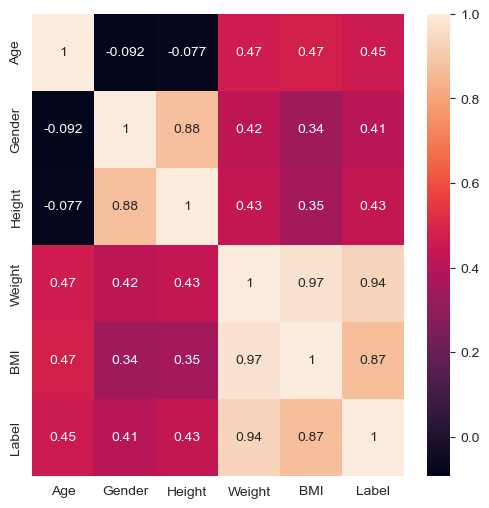

In [101]:
# Visualize the correlation with heatmap
plt.figure(figsize=(6,6))
sns.heatmap(data= corr, annot= True)

### Key Findings

- Weight and BMI has strong positive correlation with labels of obesity.
- Weight has strong positive correlation with BMI. This indicates as weight increases BMI also increases.
- Height has strong positive correlation with Gender. This indicates Males are more taller than females.

In [102]:
# Save the cleaned data
cleaned_path = os.path.join(data_path, "obesity_cleaned.csv")
df.to_csv(cleaned_path, index= False)